In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot") 

## **Cleaning data**

Most of the time `NA` values are undesired, so we basically remove them by using the `.dropna()` method. There are two main ways to use this

1. The first one is to simply do `df.dropna(inplace=True)`. The inplace argument will apply the change directly in the dataframe without having to reassign manually.
2. We can also do `df = df.dropna()` which is manually reassigning and override the dataframe. There is also the option to create a new variable to work with a copy of the dataframe.

The `.dropna()` method also receives more arguments, to specify how do we want to remove `NA` values and more, which can be consulted in the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [12]:
df = pd.read_csv("../data/dataset_banco.csv")

print(f'Dataframe shape with NA values: {df.shape}')

df.dropna(inplace=True) # this drops NA values and updates the dataframe
df = df.dropna() # this is equivalent to the code line above

print(f'Dataframe shape without NA values: {df.shape}')

Dataframe shape with NA values: (45215, 17)
Dataframe shape without NA values: (45207, 17)


When dealing with category columns, it is desired that these have at least two distinct elements, which means that if a categorical column has a single distinct element, is would not be quite useful. By calling the `.nunique()` method in the dataframe, it will display all the column names and the amount of distinct items each one have. We can also remove the duplicate rows in the dataset by using `.drop_duplicates()`

In [13]:
print(df.nunique())

print(f'\nDatashape shape before deleting duplicate rows: {df.shape}')

df.drop_duplicates(inplace=True)

print(f'Datashape shape after deleting duplicate rows: {df.shape}')

age            85
job            18
marital         6
education      10
default         2
balance      7168
housing         2
loan            6
contact         5
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        6
y               2
dtype: int64

Datashape shape before deleting duplicate rows: (45207, 17)
Datashape shape after deleting duplicate rows: (45203, 17)


### **Outliers identification**

Outliers are particular data cells that contain suspicious values. For example, if we have a column representing the age of users in a dataframe, it would not make any sense that some of the records were `560` because no one lives that long (unless you are a greenland shark but I highly doubt it).

Boxplot charts are particularly usefult to detect outliers. Here's the basic structure on how to read one:

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1200/1*0MPDTLn8KoLApoFvI0P2vQ.png" width="500">
</div>


The box extends from the first quartile (Q1) to the third quartile (Q3) with a strip at the *median*. The whiskers extend from the box to the furthest data point lying within 1.5 times the inter-quartile range from the box. Documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

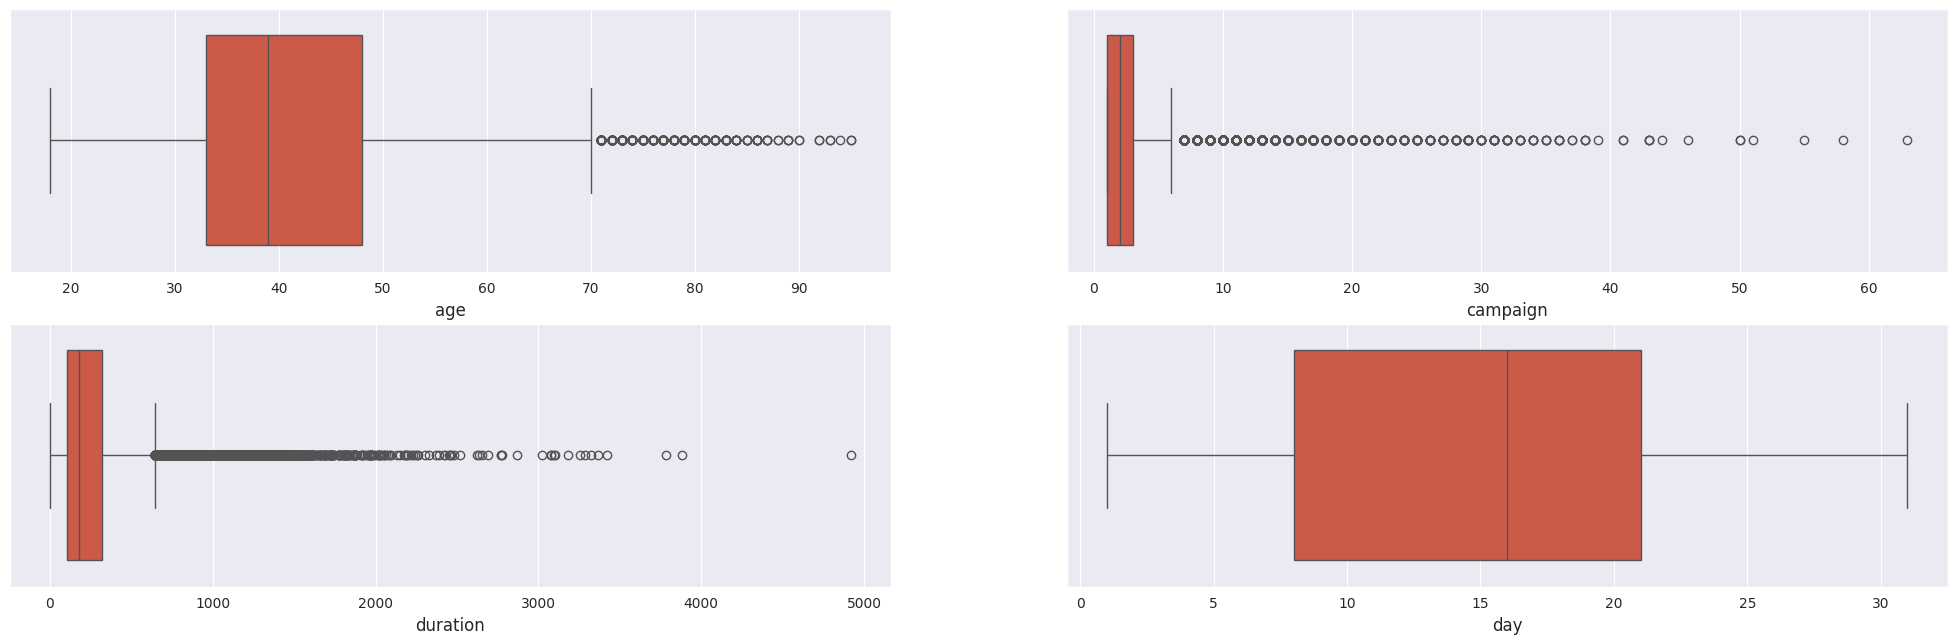

In [22]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(2,2, figsize=(25,7.5))

sns.boxplot(data=df['age'], ax=axs[0,0], orient='h')
sns.boxplot(data=df['campaign'], ax=axs[0,1], orient='h')
sns.boxplot(data=df['duration'], ax=axs[1,0], orient='h')
sns.boxplot(data=df['day'], ax=axs[1,1], orient='h')
plt.show()

### **Dropping values**

In [15]:
print(f'Dataframe shape before deleting outliers: {df.shape}')

df = df[df['age'] <= 100]
df = df[df['duration'] > 0]
df = df[df['previous'] <= 100]

print(f'Dataframe shape after deleting outliers: {df.shape}')

Dataframe shape before deleting outliers: (45203, 17)
Dataframe shape after deleting outliers: (45189, 17)


### **Fixing typography errors**

In [16]:
df['job'] = df['job'].replace(['MANAGEMENT', 'Management'], 'management')
df['job'] = df['job'].replace(['admin.'], 'administrative')
df['job'] = df['job'].replace(['Self-employed'], 'self-employed')
df['job'] = df['job'].replace(['Services'], 'services')
df['job'] = df['job'].replace(['Retired'], 'retired')

df['education'] = df['education'].replace(['SECONDARY', 'Secondary', 'sec.'],'secondary')
df['education'] = df['education'].replace(['Primary'],'primary')

df['education'] = df['education'].replace(['UNK'], 'unknown')
df['education'] = df['education'].replace(['Tertiary'], 'tertiary')

df['marital'] = df['marital'].replace(['div.', 'DIVORCED'], 'divorced')
df['marital'] = df['marital'].replace(['Single'], 'single')

df['contact'] = df['contact'].replace(['phone'], 'telephone')

df['poutcome'] = df['poutcome'].replace(['UNK'], 'unknown')
df['poutcome'] = df['poutcome'].replace(['Success'], 'success')

# plt.figure(figsize=(15,3))
# df['job'].value_counts().plot(kind='bar')

# plt.figure(figsize=(15,3))
# df['education'].value_counts().plot(kind='bar')

# plt.figure(figsize=(15,3))
# df['marital'].value_counts().plot(kind='bar')

# plt.figure(figsize=(15,3))
# df['contact'].value_counts().plot(kind='bar')

# plt.figure(figsize=(15,3))
# df['poutcome'].value_counts().plot(kind='bar')

plt.show()

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no
